In [78]:
import os
from time import time
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

%load_ext autoreload
%autoreload 2

from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest

from sklearn.svm import SVR
from sklearn.svm import SVC

from sklearn.metrics import classification_report

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
quandl_tickers = [filename[:-4] for filename in os.listdir('/Users/excalibur/Dropbox/datasets/quandl_data/') if filename != '.DS_Store']
print quandl_tickers

['ABIO', 'ACOR', 'ADMA', 'AERI', 'AFFX', 'AGEN', 'APPY', 'ARDM', 'ARIA', 'ARNA', 'ARWR', 'AXDX', 'AXGN', 'BABY', 'BASI', 'BCLI', 'BCRX', 'BGMD', 'BIIB', 'BLUE', 'BOTA', 'BRKR', 'CBLI', 'CBMG', 'CBMX', 'CBPO', 'CGEN', 'CLDN', 'CLDX', 'CNMD', 'COHR', 'CPHD', 'CPRX', 'CRIS', 'CUTR', 'CYBX', 'CYNO', 'CYTR', 'DARA', 'DRAD', 'DSCO', 'DYAX', 'ECTE', 'ECYT', 'ELOS', 'ENZN', 'ESMC', 'ETRM', 'EXAS', 'EXEL', 'FATE', 'FEIC', 'FLDM', 'FONR', 'GEVA', 'GILD', 'GNCA', 'HALO', 'HSKA', 'IART', 'ICCC', 'IDRA', 'IDXX', 'ILMN', 'IMMU', 'IMRS', 'INCY', 'INO', 'IRIX', 'LJPC', 'LPCN', 'LPTN', 'LUNA', 'MASI', 'MEIP', 'MNKD', 'MNTA', 'MYGN', 'NBIX', 'NEOG', 'NRCIA', 'NRCIB', 'NSTG', 'NVAX', 'NVDQ', 'NXTM', 'NYMX', 'OGXI', 'ONTY', 'OREX', 'OSIR', 'OXGN', 'PACB', 'PDLI', 'PGNX', 'PHMD', 'PRXL', 'PSDV', 'PSTI', 'QDEL', 'QGEN', 'QLTI', 'RGDX', 'RGEN', 'RMTI', 'RPRX', 'SGEN', 'SGMO', 'SGYP', 'SNMX', 'SPNC', 'SRNE', 'SSH', 'STEM', 'STXS', 'SURG', 'TECH', 'THLD', 'THOR', 'TNXP', 'TROV', 'TRVN', 'VICL', 'VIVO', 'VRML',

In [3]:
goog_tickers = [filename[:-4] for filename in os.listdir('/Users/excalibur/Dropbox/datasets/goog_data/') if filename != '.DS_Store']
print goog_tickers

['AAVL', 'ABIO', 'ACOR', 'ADMA', 'AERI', 'AFFX', 'AGEN', 'APPY', 'APTO', 'ARDM', 'ARIA', 'ARNA', 'ARWR', 'ATRA', 'AXDX', 'AXGN', 'BABY', 'BASI', 'BCLI', 'BCRX', 'BGMD', 'BIIB', 'BLFS', 'BLUE', 'BOTA', 'BRKR', 'CAPN', 'CASI', 'CBLI', 'CBMG', 'CBMX', 'CBPO', 'CDTX', 'CGEN', 'CGNT', 'CHRS', 'CLDN', 'CLDX', 'CLLS', 'CNMD', 'COHR', 'CPHD', 'CPRX', 'CRIS', 'CUTR', 'CYBX', 'CYNO', 'CYTR', 'DARA', 'DBVT', 'DRAD', 'DSCO', 'DYAX', 'ECTE', 'ECYT', 'EDAP', 'ELOS', 'ENZN', 'ESMC', 'ETRM', 'EXAS', 'EXEL', 'FATE', 'FEIC', 'FLDM', 'FONR', 'GENE', 'GILD', 'GNCA', 'HALO', 'HSKA', 'IART', 'ICCC', 'IDRA', 'IDXX', 'ILMN', 'IMMU', 'INCR', 'INCY', 'INO', 'IRIX', 'JUNO', 'KITE', 'LBIO', 'LJPC', 'LOXO', 'LPCN', 'LPTN', 'LUNA', 'MASI', 'MCUR', 'MEIP', 'MNKD', 'MNTA', 'MYGN', 'NBIX', 'NEOG', 'NRCIA', 'NRCIB', 'NSTG', 'NVAX', 'NVDQ', 'NXTM', 'NYMX', 'OGXI', 'ONCE', 'ONTY', 'OREX', 'OSIR', 'OXGN', 'PACB', 'PDLI', 'PGNX', 'PHMD', 'PRAH', 'PRSN', 'PRTO', 'PRXL', 'PSDV', 'PSTI', 'QDEL', 'QGEN', 'QLTI', 'QTNT', 'RGEN'

In [4]:
tickers = []
for quandl_ticker in quandl_tickers:
    if quandl_ticker in goog_tickers:
        tickers.append(quandl_ticker)
print tickers
print len(tickers)

['ABIO', 'ACOR', 'ADMA', 'AERI', 'AFFX', 'AGEN', 'APPY', 'ARDM', 'ARIA', 'ARNA', 'ARWR', 'AXDX', 'AXGN', 'BABY', 'BASI', 'BCLI', 'BCRX', 'BGMD', 'BIIB', 'BLUE', 'BOTA', 'BRKR', 'CBLI', 'CBMG', 'CBMX', 'CBPO', 'CGEN', 'CLDN', 'CLDX', 'CNMD', 'COHR', 'CPHD', 'CPRX', 'CRIS', 'CUTR', 'CYBX', 'CYNO', 'CYTR', 'DARA', 'DRAD', 'DSCO', 'DYAX', 'ECTE', 'ECYT', 'ELOS', 'ENZN', 'ESMC', 'ETRM', 'EXAS', 'EXEL', 'FATE', 'FEIC', 'FLDM', 'FONR', 'GILD', 'GNCA', 'HALO', 'HSKA', 'IART', 'ICCC', 'IDRA', 'IDXX', 'ILMN', 'IMMU', 'INCY', 'INO', 'IRIX', 'LJPC', 'LPCN', 'LPTN', 'LUNA', 'MASI', 'MEIP', 'MNKD', 'MNTA', 'MYGN', 'NBIX', 'NEOG', 'NRCIA', 'NRCIB', 'NSTG', 'NVAX', 'NVDQ', 'NXTM', 'NYMX', 'OGXI', 'ONTY', 'OREX', 'OSIR', 'OXGN', 'PACB', 'PDLI', 'PGNX', 'PHMD', 'PRXL', 'PSDV', 'PSTI', 'QDEL', 'QGEN', 'QLTI', 'RGEN', 'RMTI', 'RPRX', 'SGEN', 'SGMO', 'SGYP', 'SNMX', 'SPNC', 'SRNE', 'SSH', 'STEM', 'STXS', 'SURG', 'TECH', 'THLD', 'THOR', 'TNXP', 'TROV', 'TRVN', 'VICL', 'VIVO', 'VRML', 'WGBS', 'XLRN', 'ZLTQ']

In [17]:
pd.read_csv("/Users/excalibur/Dropbox/datasets/goog_data/ABIO.csv").head(1)

,time,CLOSE,HIGH,LOW,OPEN,VOLUME,date,week_day,op_cl%,lo_hi%
0,9.3,0.91,0.91,0.91,0.91,5591,2015-06-22,0,0,0


In [77]:
def convert_data_to_df(ticker):
    df = pd.read_csv("/Users/excalibur/Dropbox/datasets/goog_data/{}.csv".format(ticker))

    df = df[(df['time'] == 9.30) | (df['time'] == 10.0)]
    
    df = df.replace([np.inf, -np.inf], np.nan)
    df = df.dropna()
    df = df[df['date'] > '2010-01-01'] # get more recent data
    df = df[(df['OPEN'] > 1.0) & (df['OPEN'] < 9.0)] # get stocks over 1.0 and less than 9.0

    df_930 = df[df['time'] == 9.30]
    df_100 = df[df['time'] == 10.0]
    
    df = df_930.merge(df_100, how='inner', on='date')
    
    df['volume_change'] = df['VOLUME_y'] - df['VOLUME_x']
    
    df['volume_change_perc'] = (df['VOLUME_y'] / df['VOLUME_x']) - 1
    
    df['ticker'] = ticker
    
    return df.copy()

stock_df = pd.DataFrame()
for ticker in tickers:
    if stock_df.empty:
        stock_df = convert_data_to_df(ticker)
    else:
        stock_df = stock_df.append(convert_data_to_df(ticker))


print stock_df.shape
stock_df.to_csv('goog.csv', index=False)
stock_df.head()

(2289, 22)


,CLOSE_x,CLOSE_y,HIGH_x,HIGH_y,LOW_x,LOW_y,OPEN_x,OPEN_y,VOLUME_x,VOLUME_y,...,lo_hi%_y,op_cl%_x,op_cl%_y,ticker,time_x,time_y,volume_change,volume_change_perc,week_day_x,week_day_y
0,1.05,1.0189,1.05,1.0599,1.05,0.9601,1.05,1.0510,7359,103844,...,0.103948,0,-0.030542,ABIO,9.3,10,96485,13.111156,0,0
1,1.01,1.0300,1.01,1.0500,1.01,1.0100,1.01,1.0500,2297,45898,...,0.039604,0,-0.019048,ABIO,9.3,10,43601,18.981715,1,1
2,1.09,1.0750,1.09,1.0999,1.09,1.0601,1.09,1.0999,108,20838,...,0.037544,0,-0.022638,ABIO,9.3,10,20730,191.944444,3,3
3,1.07,1.0608,1.07,1.1400,1.07,1.0600,1.07,1.0700,4446,37944,...,0.075472,0,-0.008598,ABIO,9.3,10,33498,7.534413,0,0
4,1.11,1.1000,1.11,1.1298,1.11,1.0800,1.11,1.1298,620,52080,...,0.046111,0,-0.026376,ABIO,9.3,10,51460,83.000000,1,1


In [240]:
stock_df[stock_df['OH%'] >= 0.05].shape

(12329, 21)

In [241]:
X_df = stock_df.drop(['date','label'], axis=1)
X_df['ticker'] = X_df['ticker'].astype('category').cat.codes
X = X_df.values.astype('float32')
print X.shape
print X[0].shape
print X[0]

(82501, 19)
(19,)
[  3.23006392e+00   3.30006599e+00   3.17006302e+00   3.28006601e+00
   7.20000000e+03   2.94225883e+00   4.43888855e+00   1.54801887e-02
   4.10095938e-02   2.16720160e-02   3.21006393e+00   3.28006601e+00
   3.17006302e+00   3.26006508e+00   6.20000000e+03   1.55763254e-02
   3.47005725e-02   2.18070410e-02   0.00000000e+00]


(82501,)
()
0.0


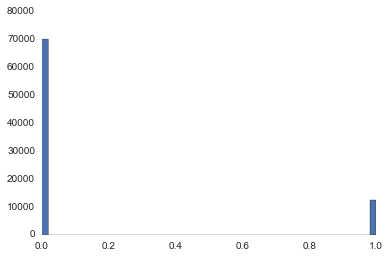

In [242]:
Y_df = stock_df.loc[:, 'label'].map(lambda x: 1 if x >= 0.05 else 0)
Y = Y_df.values.astype('float32')
print Y.shape
print Y[0].shape
print Y[0]
plt.hist(Y, bins=50)
plt.show()

---

In [249]:
'''
# hyperparameters
ks = [x for x in xrange(1,X.shape[1])]
Cs = [2**x for x in xrange(-15, 20, 5)]
epsilons = [10**-x for x in xrange(1,5)]
gammas = [2**x for x in xrange(-15, 20, 5)]

# RANDOM SEARCH
for i in xrange(20):
    k = np.random.choice(ks)
    skb = SelectKBest(k=k)
    skb = skb.fit(X_train,y_train.ravel())
    skb_X_train = skb.transform(X_train)
    
    C = np.random.choice(Cs)
    epsilon = np.random.choice(epsilons)
    gamma = np.random.choice(gammas)
    
    #clf = SVR(C=C, cache_size=200, coef0=0.0, degree=3, epsilon=epsilon, gamma=gamma, kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
    clf = SVC(C=C, cache_size=200, class_weight='auto', coef0=0.0, degree=3, gamma=gamma, kernel='rbf', max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001, verbose=False)
    clf.fit(skb_X_train,y_train.ravel())
    
    skb_X_validation = skb.transform(X_validation)
    print "k =", k, "C =", C, "epsilon =", epsilon, "gamma =", gamma, "score:", clf.score(skb_X_validation,y_validation.ravel())
#'''

'\n# hyperparameters\nks = [x for x in xrange(1,X.shape[1])]\nCs = [2**x for x in xrange(-15, 20, 5)]\nepsilons = [10**-x for x in xrange(1,5)]\ngammas = [2**x for x in xrange(-15, 20, 5)]\n\n# RANDOM SEARCH\nfor i in xrange(20):\n    k = np.random.choice(ks)\n    skb = SelectKBest(k=k)\n    skb = skb.fit(X_train,y_train.ravel())\n    skb_X_train = skb.transform(X_train)\n    \n    C = np.random.choice(Cs)\n    epsilon = np.random.choice(epsilons)\n    gamma = np.random.choice(gammas)\n    \n    #clf = SVR(C=C, cache_size=200, coef0=0.0, degree=3, epsilon=epsilon, gamma=gamma, kernel=\'rbf\', max_iter=-1, shrinking=True, tol=0.001, verbose=False)\n    clf = SVC(C=C, cache_size=200, class_weight=\'auto\', coef0=0.0, degree=3, gamma=gamma, kernel=\'rbf\', max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001, verbose=False)\n    clf.fit(skb_X_train,y_train.ravel())\n    \n    skb_X_validation = skb.transform(X_validation)\n    print "k =", k, "C =", C, "epsilon =", e

Open 400.184
High 329.341
Low 451.872
Close 385.253
50dravg 340.717
HL% 927.017
OH% 425.874
LastOpen 392.691
LastHigh 347.519
LastLow 445.063
LastClose 401.314
LastHL% 469.227
----------
features 12
outputs 2
h1 1129
h2 448
W1 (1129, 12)
b1 (1129, 1)
W2 (448, 1129)
b2 (448, 1)
W3 (2, 448)
b3 (2, 1)
----------
h1: 1129 h2: 448 epochs: 50 Lambda: 0.001 Reg: L1 alpha: 0.001
last mean validation loss: 0.69
last mean training loss: 0.72


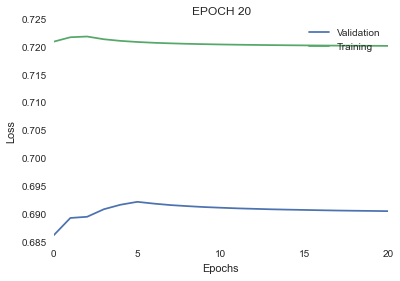

h1: 1129 h2: 448 epochs: 50 Lambda: 0.001 Reg: L1 alpha: 1.12466280598e-31
last mean validation loss: 0.69
last mean training loss: 0.71


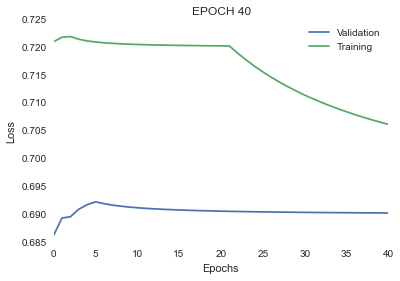

Open 400.184
High 329.341
Low 451.872
Close 385.253
Volume 45.4266
50dravg 340.717
200dravg 253.144
HL% 927.017
OH% 425.874
LastOpen 392.691
LastHigh 347.519
LastLow 445.063
LastClose 401.314
LastHL% 469.227
LastOH% 167.658
----------
features 15
outputs 2
h1 1466
h2 180
W1 (1466, 15)
b1 (1466, 1)
W2 (180, 1466)
b2 (180, 1)
W3 (2, 180)
b3 (2, 1)
----------
h1: 1466 h2: 180 epochs: 50 Lambda: 0.1 Reg: L1 alpha: 0.0001
last mean validation loss: 0.69
last mean training loss: 0.69


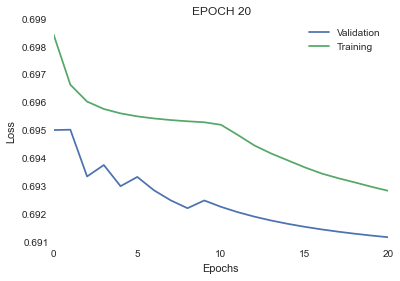

h1: 1466 h2: 180 epochs: 50 Lambda: 0.1 Reg: L1 alpha: 1.44692874144e-31
last mean validation loss: 0.69
last mean training loss: 0.69


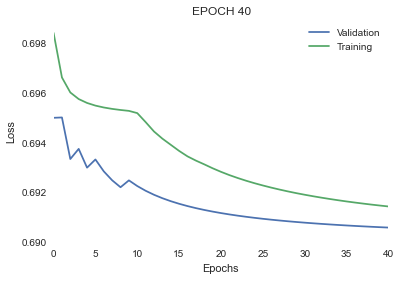

HL% 927.017
LastHL% 469.227
----------
features 2
outputs 2
h1 55
h2 198
W1 (55, 2)
b1 (55, 1)
W2 (198, 55)
b2 (198, 1)
W3 (2, 198)
b3 (2, 1)
----------
h1: 55 h2: 198 epochs: 50 Lambda: 0.1 Reg: L1 alpha: 0.1
last mean validation loss: 0.69
last mean training loss: 0.77


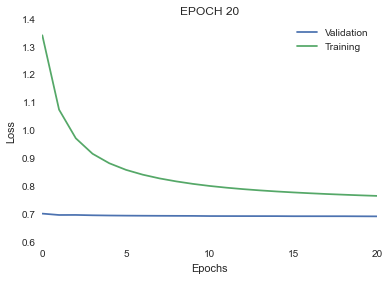

h1: 55 h2: 198 epochs: 50 Lambda: 0.1 Reg: L1 alpha: 1.16786727749e-30
last mean validation loss: 0.69
last mean training loss: 0.73


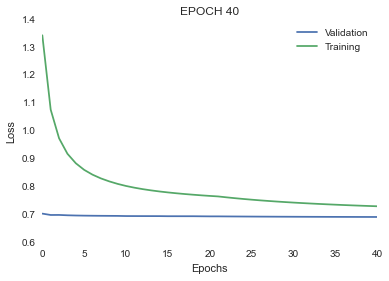

HL% 927.017
LastHL% 469.227
----------
features 2
outputs 2
h1 84
h2 168
W1 (84, 2)
b1 (84, 1)
W2 (168, 84)
b2 (168, 1)
W3 (2, 168)
b3 (2, 1)
----------
h1: 84 h2: 168 epochs: 50 Lambda: 0.1 Reg: L1 alpha: 0.01
last mean validation loss: 0.7
last mean training loss: 0.81


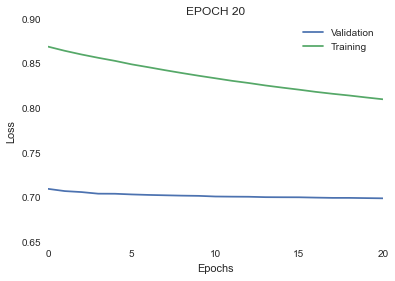

h1: 84 h2: 168 epochs: 50 Lambda: 0.1 Reg: L1 alpha: 2.70789562817e-28
last mean validation loss: 0.7
last mean training loss: 0.75


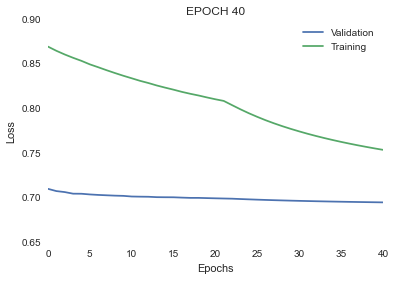

Open 400.184
High 329.341
Low 451.872
Close 385.253
Volume 45.4266
50dravg 340.717
200dravg 253.144
HL% 927.017
OH% 425.874
LastOpen 392.691
LastHigh 347.519
LastLow 445.063
LastClose 401.314
LastHL% 469.227
LastOH% 167.658
----------
features 15
outputs 2
h1 884
h2 1272
W1 (884, 15)
b1 (884, 1)
W2 (1272, 884)
b2 (1272, 1)
W3 (2, 1272)
b3 (2, 1)
----------


KeyboardInterrupt: 

In [287]:
from nn import *
# RANDOM SEARCH
for i in xrange(20):
    NN(X_df.columns,X,Y)